<a href="https://colab.research.google.com/github/Dinmir331/Semester8_LB1/blob/main/S8_CV_LB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Описание**

1 лаба -- Фильтрация изображений, свёртки, морфологические операции над изображением нужно провести без использования библиотек компьютерного зрения. Можно только NumPy

# Загрузка библиотек и данных. функции отображения изображений

## Основные библиотеки и подключение гугл диска

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Подключение Google Drive для загрузки изображения
from google.colab import drive
drive.mount('/content/drive')

# Чтение изображения с использованием OpenCV и преобразование его в RGB
image_path = '/content/drive/MyDrive/Colab Notebooks/IMAGE.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Преобразование из BGR в RGB

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Получаем размеры изображения
height, width, channels = image.shape

# Выводим размеры
print(f"Высота: {height}, Ширина: {width}, Количество каналов: {channels}")

Высота: 512, Ширина: 1024, Количество каналов: 3


## Функция для отображения изображения


In [14]:
# Функция для отображения изображения
def show_image(image, title='Image'):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Функция для отображения пары изображений
def show_images_pair(original, processed, title_original='Original', title_processed='Processed'):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed)
    plt.title(title_processed)
    plt.axis('off')
    plt.show()

# Функция для отображения каналов R, G, B
def show_channels(image, title_prefix=''):
    channels = ['Red', 'Green', 'Blue']

    # Основной заголовок над всеми каналами
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'{title_prefix} Channels', fontsize=16, y=0.8)

    for i, channel in enumerate(channels):
        plt.subplot(1, 3, i+1)
        plt.imshow(image[:, :, i], cmap='gray')
        plt.title(f'{channel} Channel', fontsize=12)
        plt.axis('off')

    plt.tight_layout(pad=0.5)
    plt.subplots_adjust(top=0.85)
    plt.show()

##Функция отображения распределения пикселей по каналам RGB

In [15]:
def plot_histogram(image, title="Histogram of Image"):
    """Выводит гистограмму распределения пикселей по значению цвета в каждом канале RGB."""
    plt.figure(figsize=(10, 5))

    # Создание гистограмм для каждого канала
    colors = ['red', 'green', 'blue']
    labels = ['Red Channel', 'Green Channel', 'Blue Channel']

    for i, color in enumerate(colors):
        plt.subplot(1, 3, i+1)
        plt.hist(image[:, :, i].ravel(), bins=256, range=(0, 255), color=color, alpha=0.7)
        plt.title(labels[i])
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


## Создание краев для изображения

In [16]:
def apply_padding(image, kernel_size=13, mode='edge'):
    pad = kernel_size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode=mode)
    return padded_image

# Применение паддинга
padded_image = apply_padding(image)


# Получаем размеры изображения
height, width, channels = padded_image.shape
# Выводим размеры
print(f"Высота: {height}, Ширина: {width}, Количество каналов: {channels}")

Высота: 524, Ширина: 1036, Количество каналов: 3


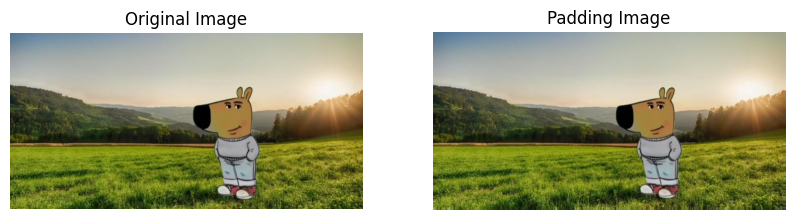

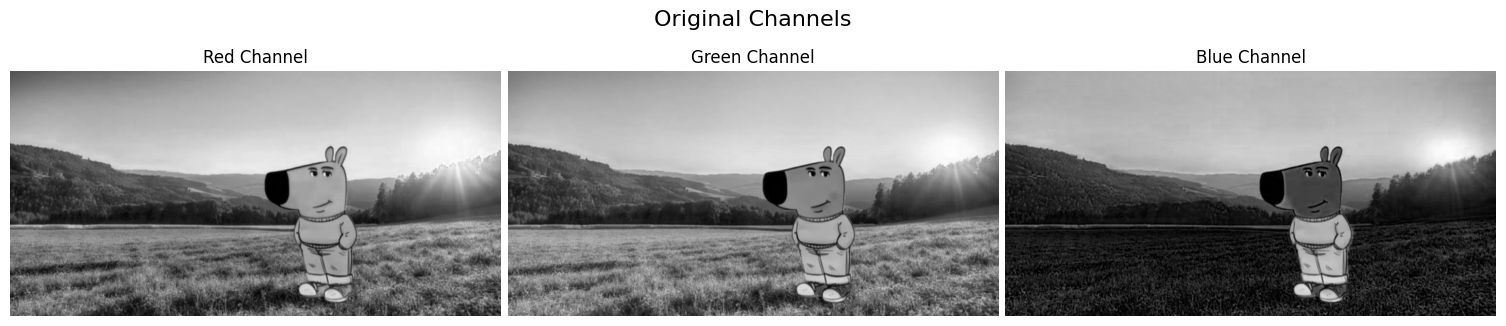

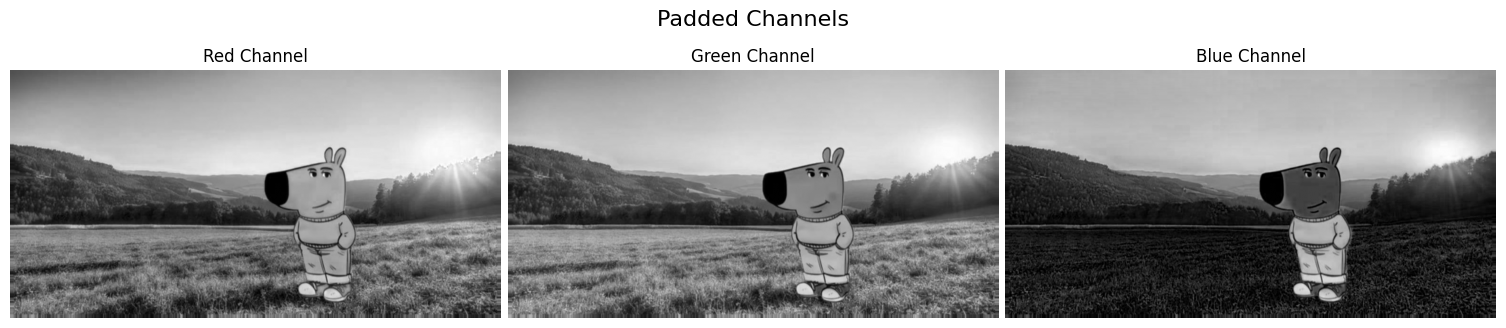

In [17]:
# Отображение результатов паддинга
show_images_pair(image, padded_image, "Original Image", "Padding Image")
show_channels(image, "Original")
show_channels(padded_image, "Padded")

# 1. Морфологические операции: Эрозия и дилатация

## Эрозия

In [18]:
# Эрозия изображения — уменьшение яркости пикселей
def erosion(image, kernel_size=13):
    pad = kernel_size // 2
    result = np.zeros_like(image)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            result[i, j] = np.min(image[i-pad:i+pad+1, j-pad:j+pad+1], axis=(0, 1))
    # Убираем добавленный паддинг, чтобы вернуть изображение к исходному размеру
    result = result[pad:-pad, pad:-pad]
    return result

# Применение эрозии
eroded_image = erosion(padded_image)

# Получаем размеры изображения
height, width, channels = eroded_image.shape
# Выводим размеры
print(f"Высота: {height}, Ширина: {width}, Количество каналов: {channels}")

Высота: 512, Ширина: 1024, Количество каналов: 3


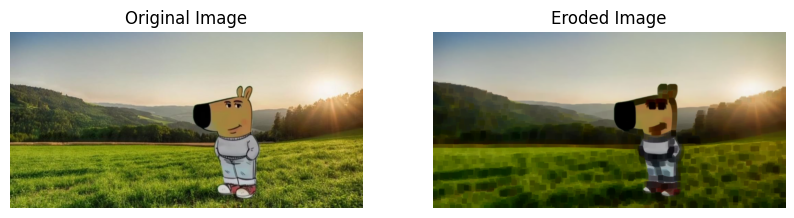

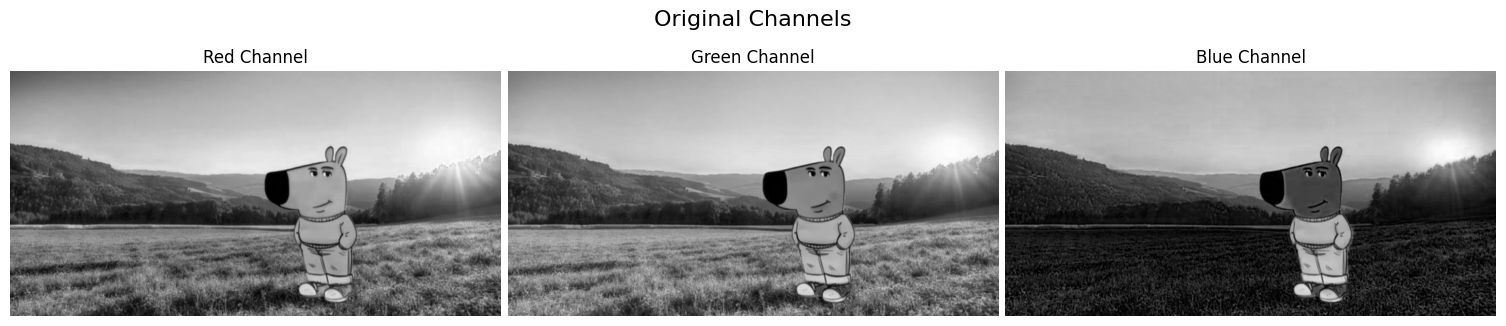

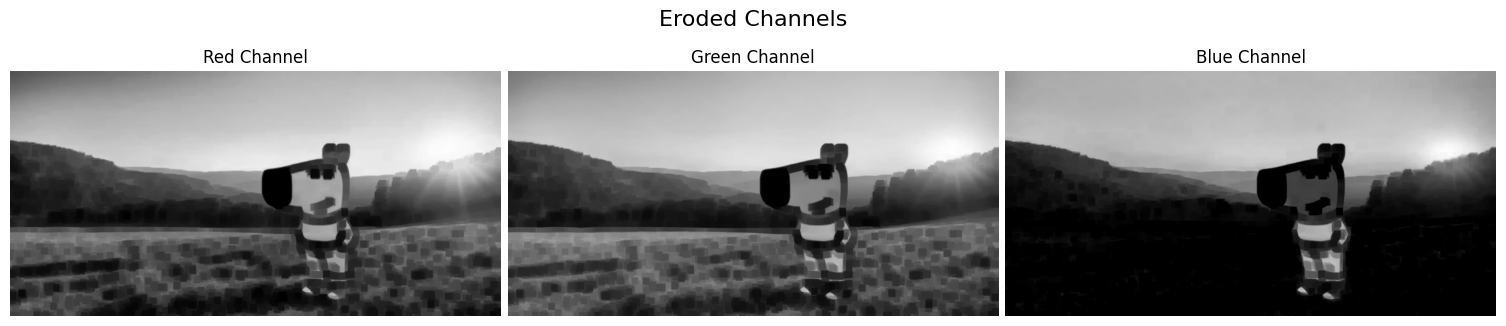

In [19]:
# Отображение результатов эрозии
show_images_pair(image, eroded_image, "Original Image", "Eroded Image")
show_channels(image, "Original")
show_channels(eroded_image, "Eroded")

## Дилатация

In [20]:
# Дилатация изображения — увеличение яркости пикселей
def dilation(image, kernel_size=13):
    pad = kernel_size // 2
    result = np.zeros_like(image)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            result[i, j] = np.max(image[i-pad:i+pad+1, j-pad:j+pad+1], axis=(0, 1))
    result = result[pad:-pad, pad:-pad]
    return result

# Применение дилатации
dilated_image = dilation(padded_image)

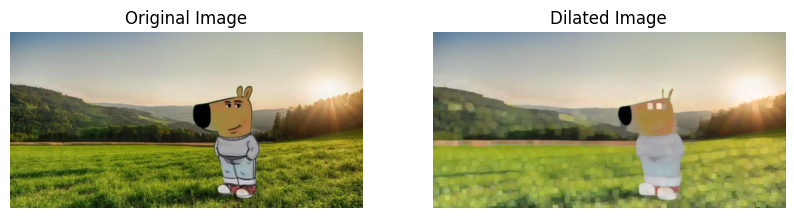

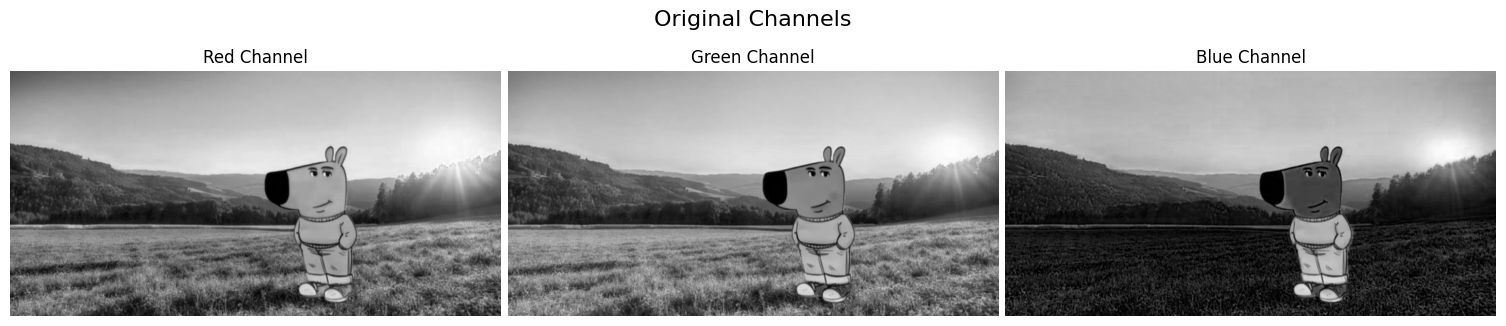

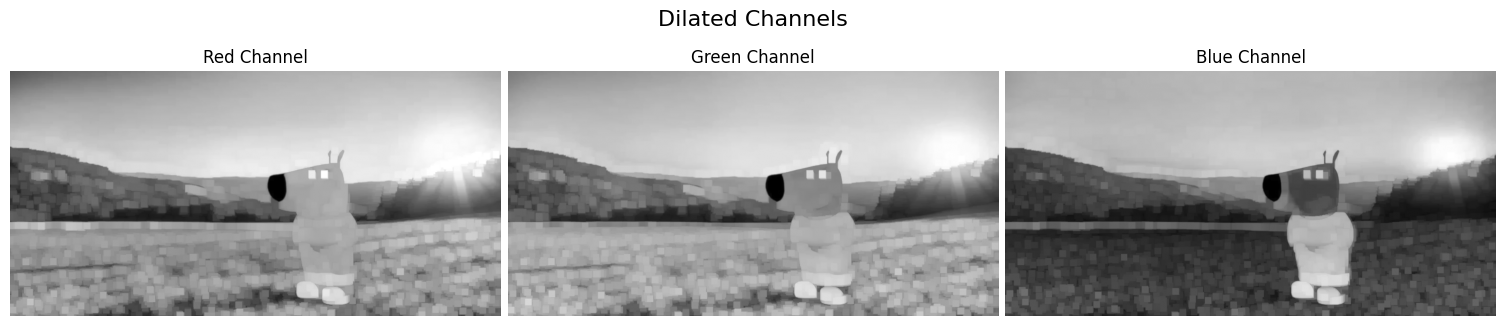

In [21]:
# Отображение результатов дилатации
show_images_pair(image, dilated_image, "Original Image", "Dilated Image")
show_channels(image, "Original")
show_channels(dilated_image, "Dilated")

# 2. Фильтры: Гауссов фильтр и медианный фильтр

## Гауссов фильтр

In [22]:
# Гауссов фильтр — сглаживание изображения
def gaussian_filter(image, kernel_size=13, sigma=5.0):
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    kernel /= np.sum(kernel)

    pad = kernel_size // 2
    result = np.zeros_like(image)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            for k in range(3):
                result[i, j, k] = np.sum(kernel * image[i-pad:i+pad+1, j-pad:j+pad+1, k])
    result = result[pad:-pad, pad:-pad]
    return result.astype(np.uint8)

# Применение гауссова фильтра
gaussian_filtered = gaussian_filter(padded_image)

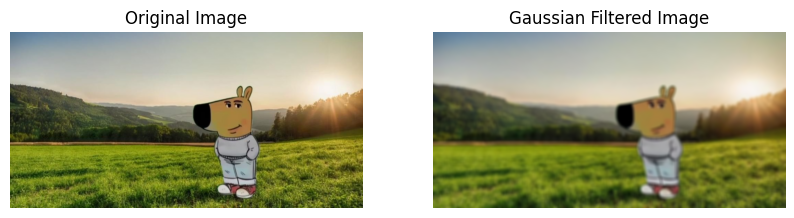

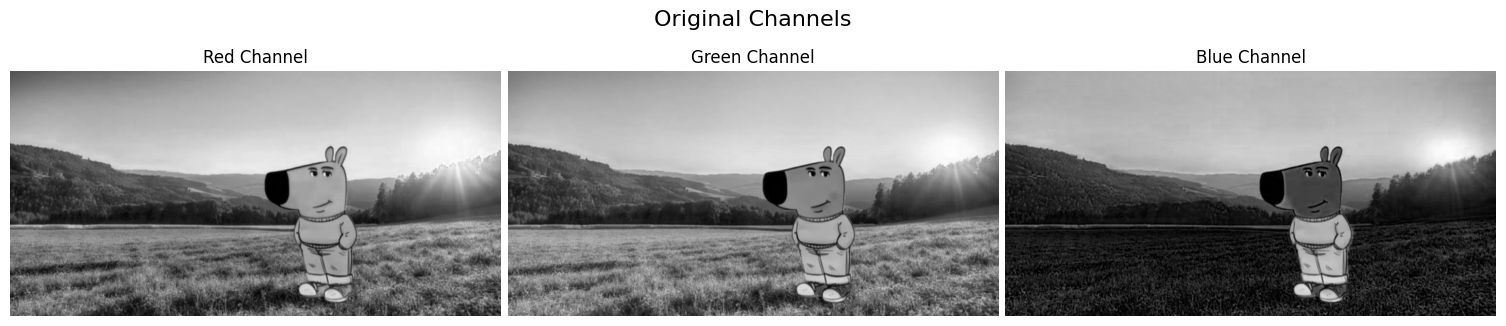

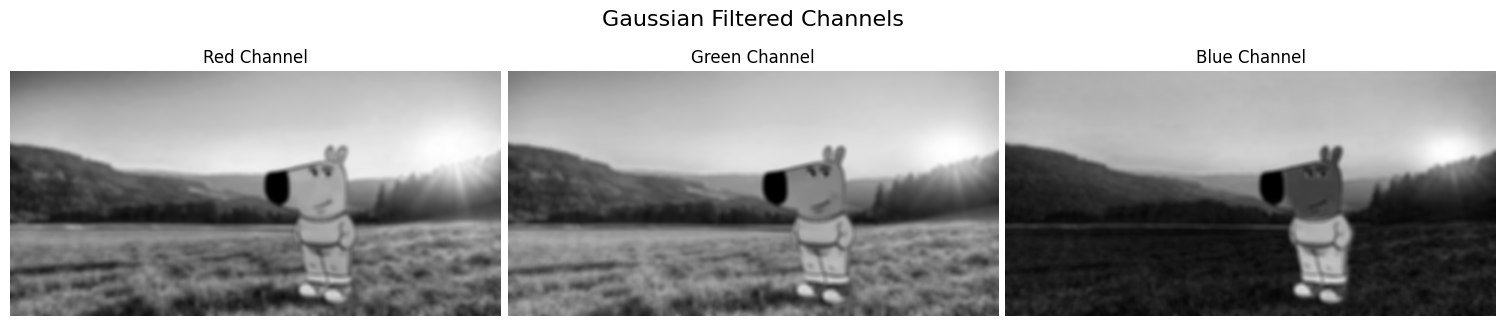

In [23]:
# Отображение результатов гауссова фильтра
show_images_pair(image, gaussian_filtered, "Original Image", "Gaussian Filtered Image")
show_channels(image, "Original")
show_channels(gaussian_filtered, "Gaussian Filtered")

## Медианный фильтр

In [25]:
# Медианный фильтр — удаление шумов
def median_filter(image, kernel_size=13):
    pad = kernel_size // 2
    result = np.zeros_like(image)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            for k in range(3):
                result[i, j, k] = np.median(image[i-pad:i+pad+1, j-pad:j+pad+1, k])
    result = result[pad:-pad, pad:-pad]
    return result

# Применение медианного фильтра
median_filtered = median_filter(padded_image)

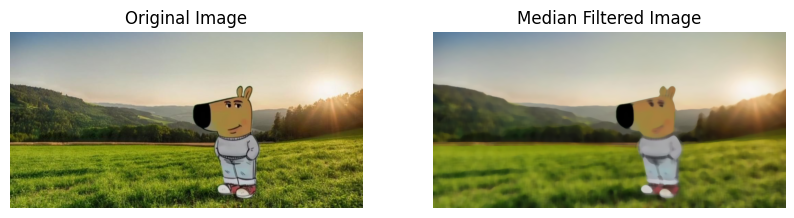

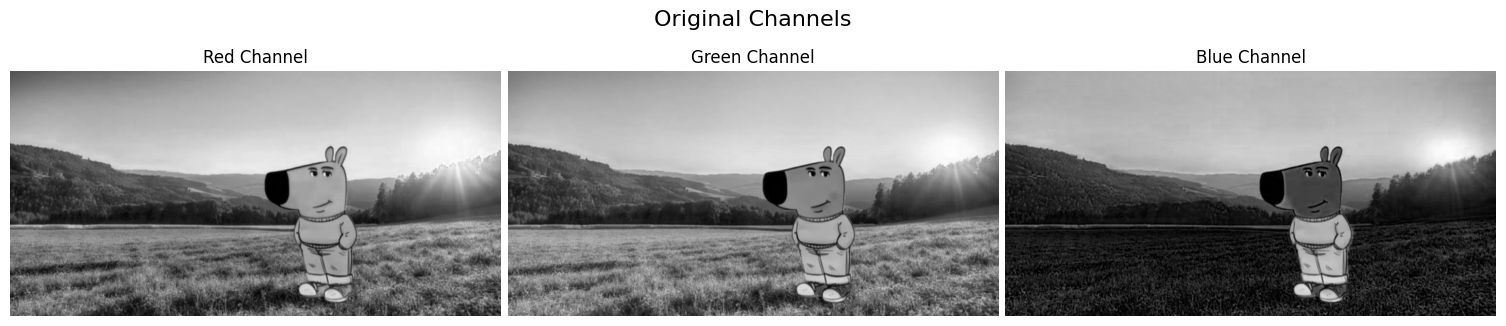

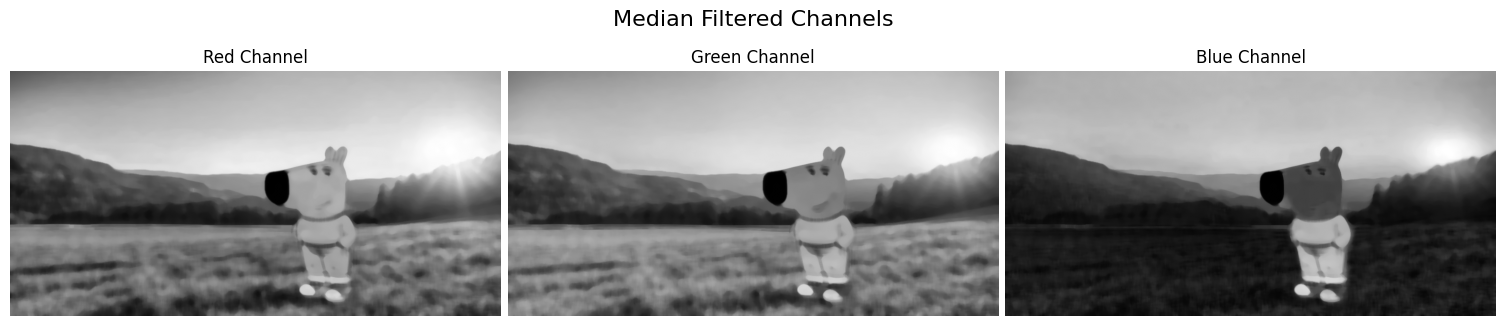

In [26]:
# Отображение результатов медианного фильтра
show_images_pair(image, median_filtered, "Original Image", "Median Filtered Image")
show_channels(image, "Original")
show_channels(median_filtered, "Median Filtered")

# 3. Бинаризация изображения

In [27]:
# Бинаризация изображения — пороговое преобразование для каждого канала
def binarize_image(image, threshold=128):
    binary_image = np.zeros_like(image)
    for i in range(3):  # Применение порогового преобразования к каждому каналу
        binary_image[:, :, i] = (image[:, :, i] > threshold).astype(np.uint8) * 255
    return binary_image

# Применение бинаризации
binary_image = binarize_image(image)

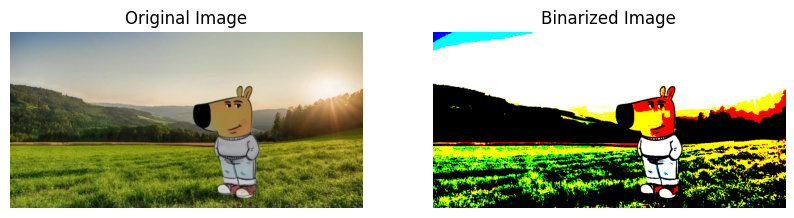

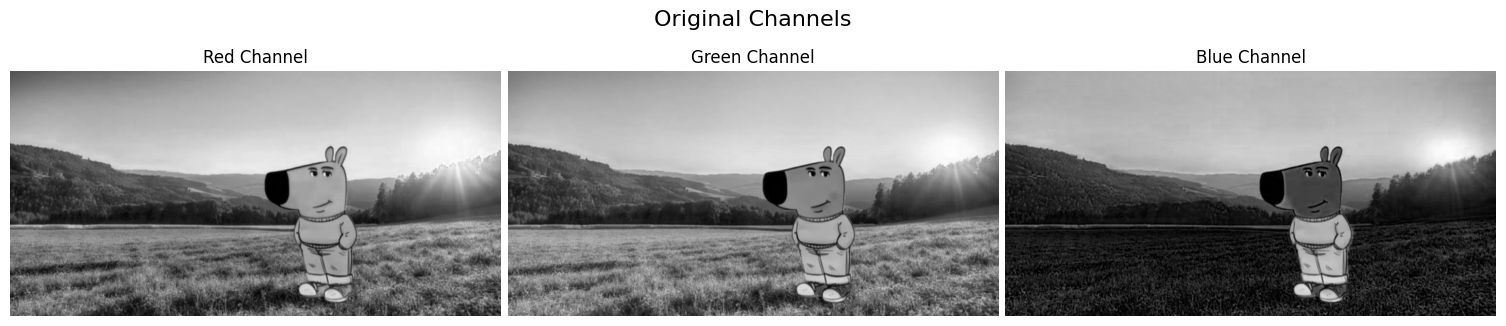

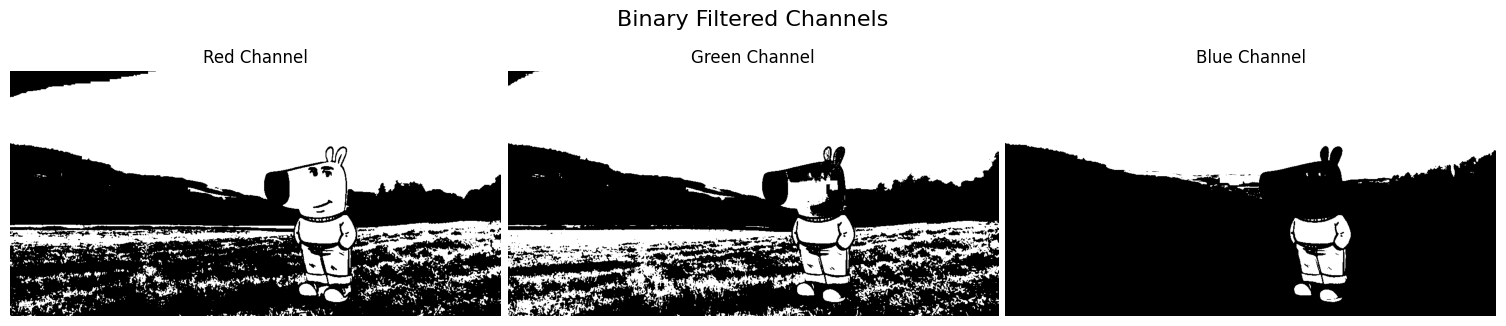

In [28]:
# Отображение бинаризованного изображения
show_images_pair(image, binary_image, "Original Image", "Binarized Image")
show_channels(image, "Original")
show_channels(binary_image, "Binary Filtered")

# 4. Коррекция яркости/освещенности

## Коррекция яркости по коэффициенту

In [29]:
# Коррекция яркости — увеличение яркости на основе коэффициента
def adjust_brightness(image, factor=2.0):
    result = np.clip(image * factor, 0, 255)
    return result.astype(np.uint8)

# Применение коррекции яркости
brightened_image = adjust_brightness(image)

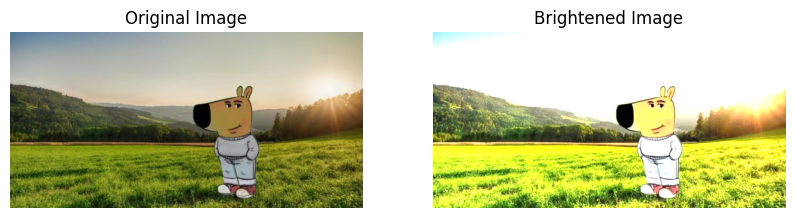

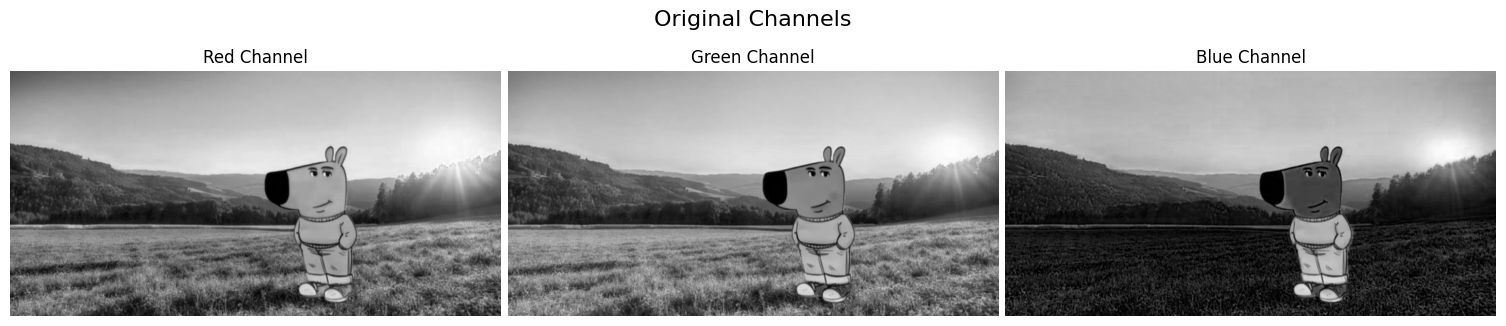

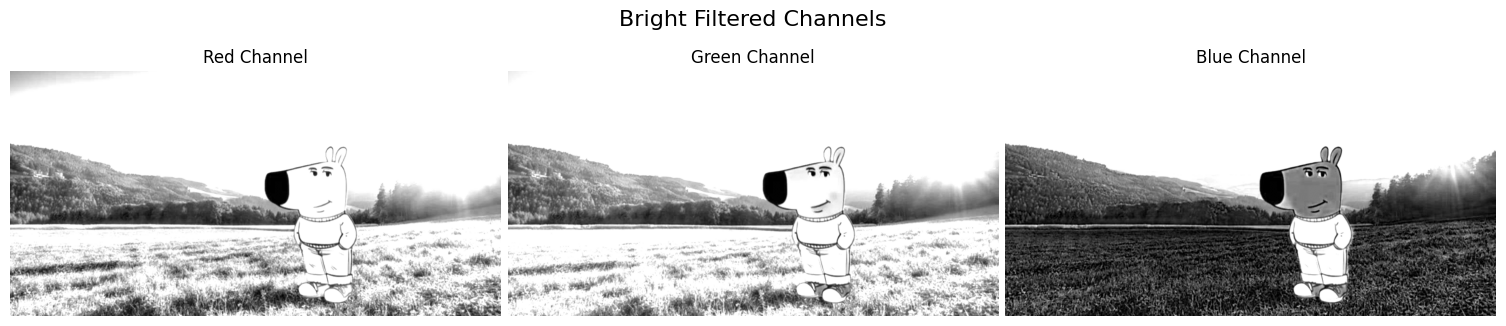

In [30]:
show_images_pair(image, brightened_image, "Original Image", "Brightened Image")
show_channels(image, "Original")
show_channels(brightened_image, "Bright Filtered")

## Коррекция яркости по гистограмме

In [31]:
def equalize_histogram(image):
    """Выравнивание гистограммы для каждого канала RGB для усиления контраста."""
    result = np.zeros_like(image)

    for i in range(3):  # Применяем выравнивание к каждому каналу отдельно (R, G, B)
        channel = image[:, :, i]

        # Строим гистограмму
        hist, bins = np.histogram(channel.flatten(), bins=256, range=[0, 255])

        # Вычисляем кумулятивную сумму (CDF)
        cdf = hist.cumsum()
        cdf_normalized = cdf / float(cdf[-1])  # Нормализуем CDF

        # Преобразуем значения пикселей с использованием CDF
        equalized_channel = np.interp(channel.flatten(), bins[:-1], cdf_normalized * 255)

        # Возвращаем измененный канал в исходную форму
        result[:, :, i] = equalized_channel.reshape(channel.shape)

    return result.astype(np.uint8)

equalized_image = equalize_histogram(image)

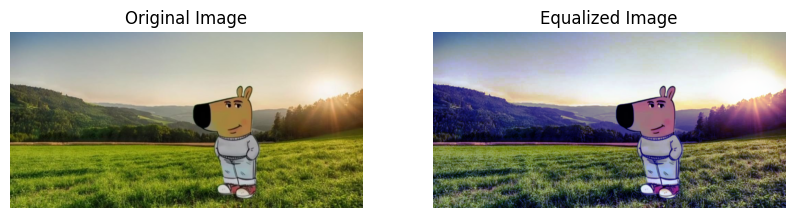

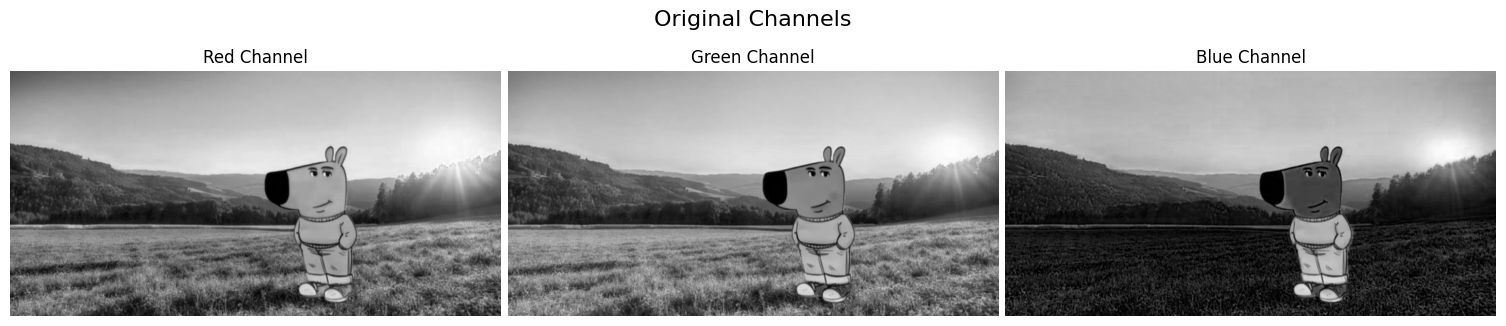

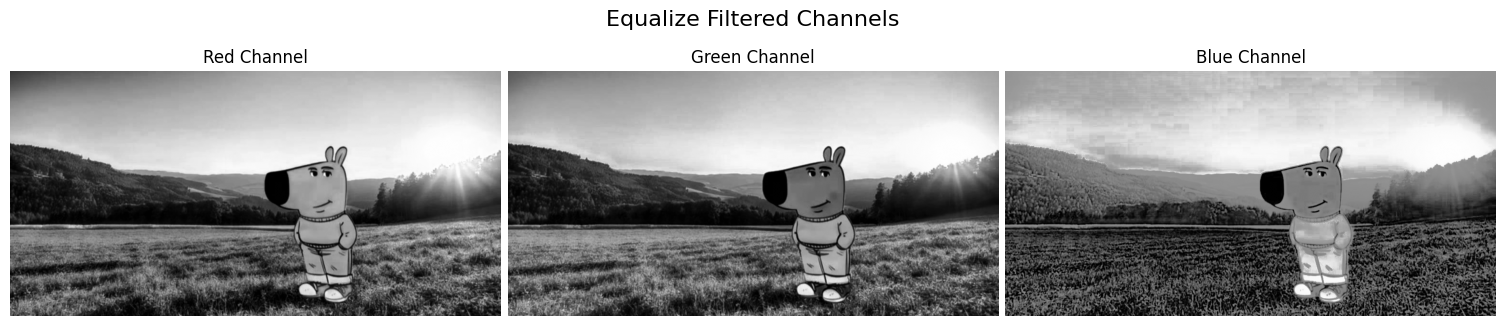

In [32]:
show_images_pair(image, equalized_image, "Original Image", "Equalized Image")
show_channels(image, "Original")
show_channels(equalized_image, "Equalize Filtered")

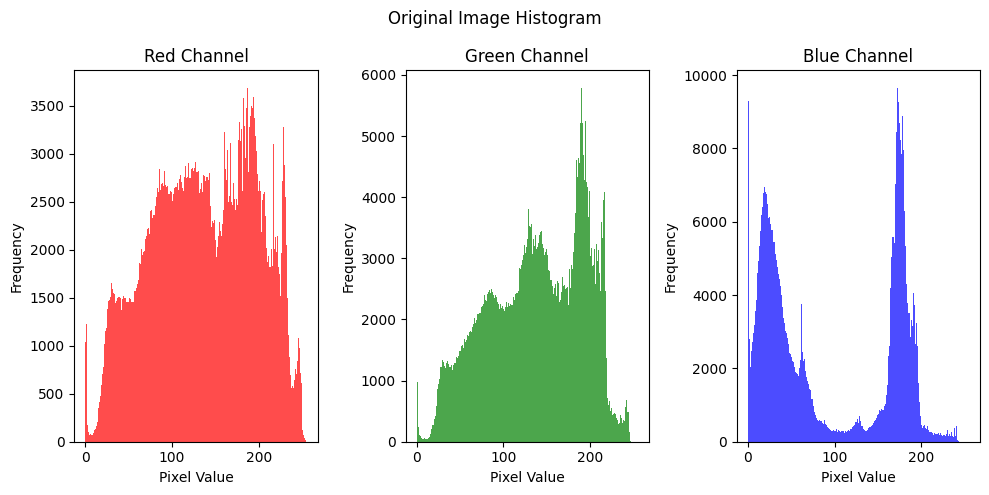

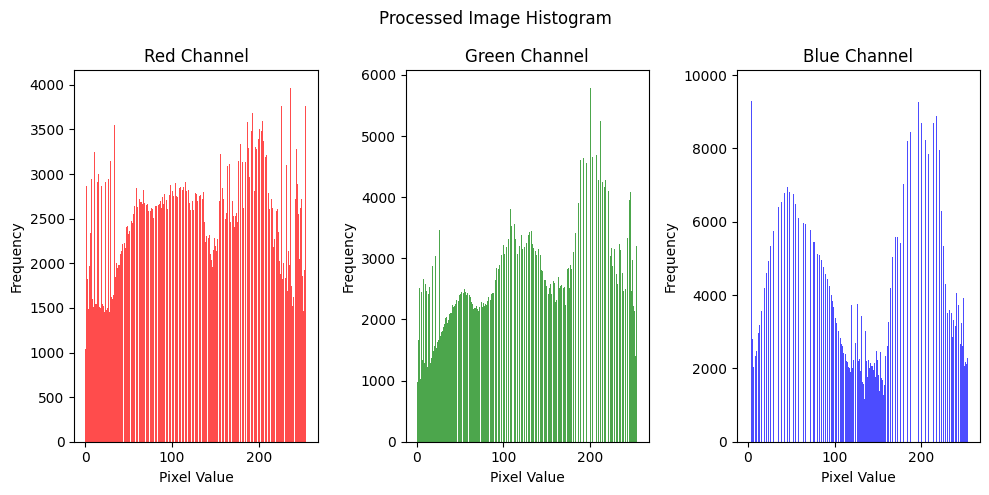

In [33]:
plot_histogram(image, "Original Image Histogram")  # Гистограмма оригинального изображения
plot_histogram(equalized_image, "Processed Image Histogram")  # Гистограмма обработанного изображения

In [34]:
# Улучшенное выравнивание гистограммы для RGB-каналов с минимизацией пропусков

def enhanced_equalize_histogram(image):
    result = np.zeros_like(image, dtype=np.uint8)

    for i in range(3):  # Применяем для каждого канала (R, G, B)
        channel = image[:, :, i].astype(np.float32)

        # Добавляем небольшой шум для устранения "пропущенных" значений
        noise = np.random.uniform(-1, 1, channel.shape)
        channel = np.clip(channel + noise, 0, 255)

        # Вычисляем гистограмму и CDF
        hist, bins = np.histogram(channel.flatten(), bins=256, range=[0, 255])
        cdf = hist.cumsum()
        cdf = (cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255  # Нормализация CDF

        # Интерполяция значений
        equalized_channel = np.interp(channel.flatten(), bins[:-1], cdf)

        # Дополнительное сглаживание после выравнивания
        equalized_channel = np.convolve(equalized_channel, np.ones(3)/3, mode='same')

        # Возвращаем в 2D-форму
        result[:, :, i] = equalized_channel.reshape(channel.shape).astype(np.uint8)

    return result

enc_equalized_image = enhanced_equalize_histogram(image)

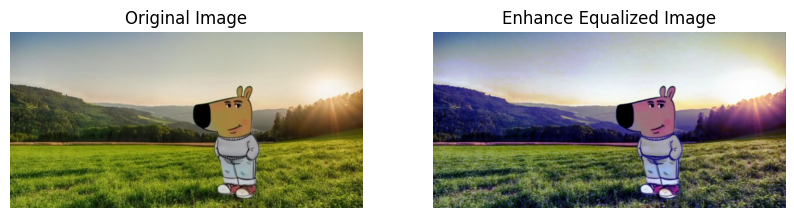

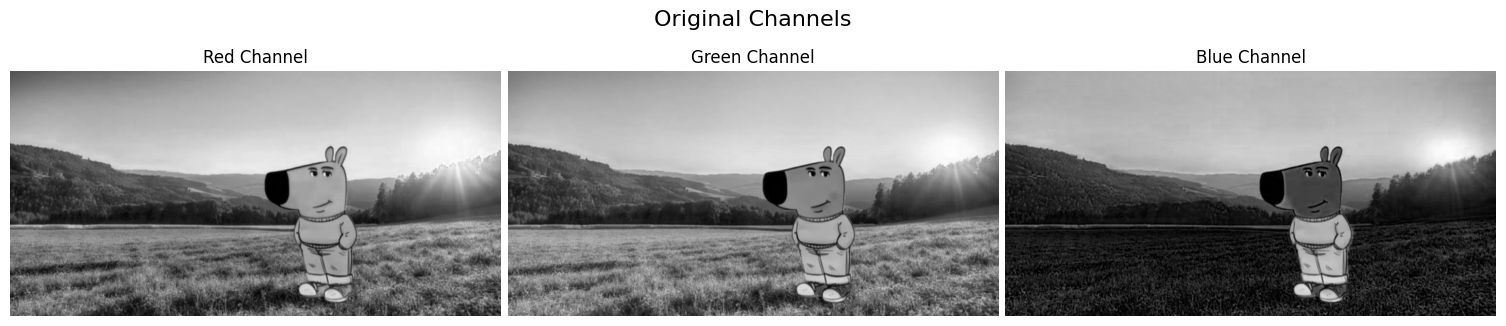

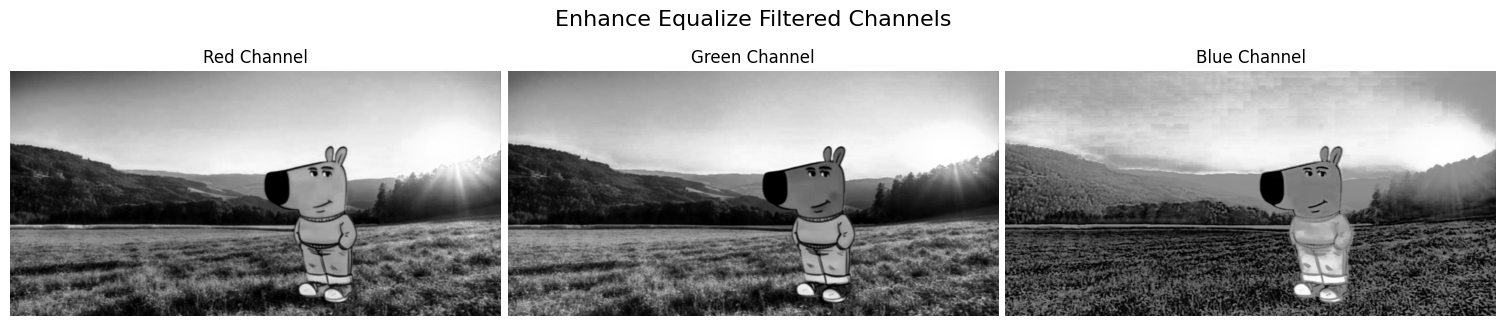

In [35]:
show_images_pair(image, enc_equalized_image, "Original Image", "Enhance Equalized Image")
show_channels(image, "Original")
show_channels(enc_equalized_image, "Enhance Equalize Filtered")

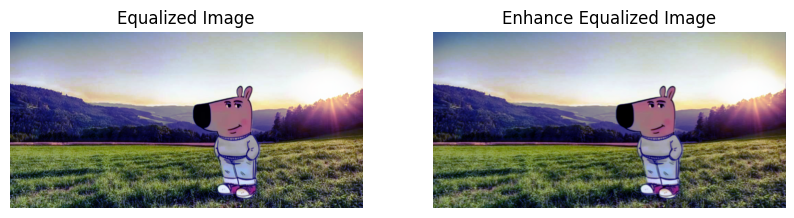

In [36]:
show_images_pair(equalized_image, enc_equalized_image, "Equalized Image", "Enhance Equalized Image")

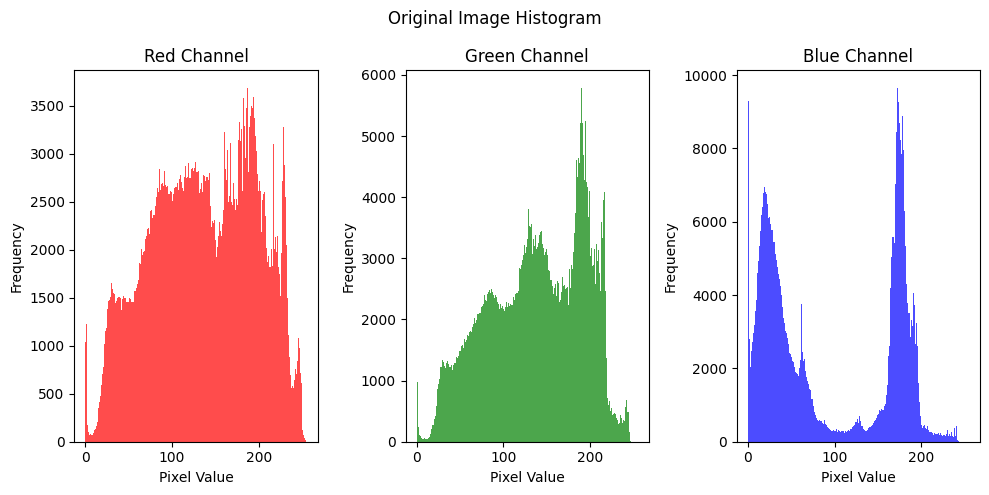

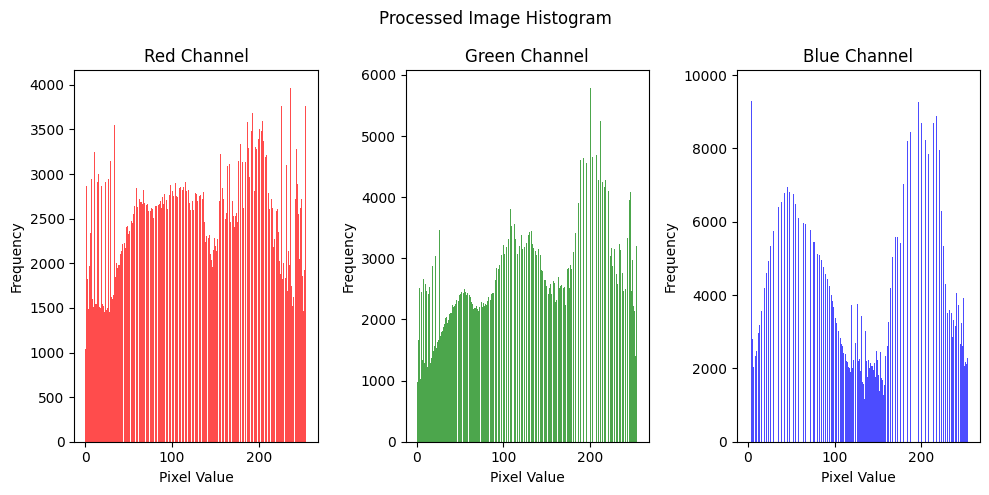

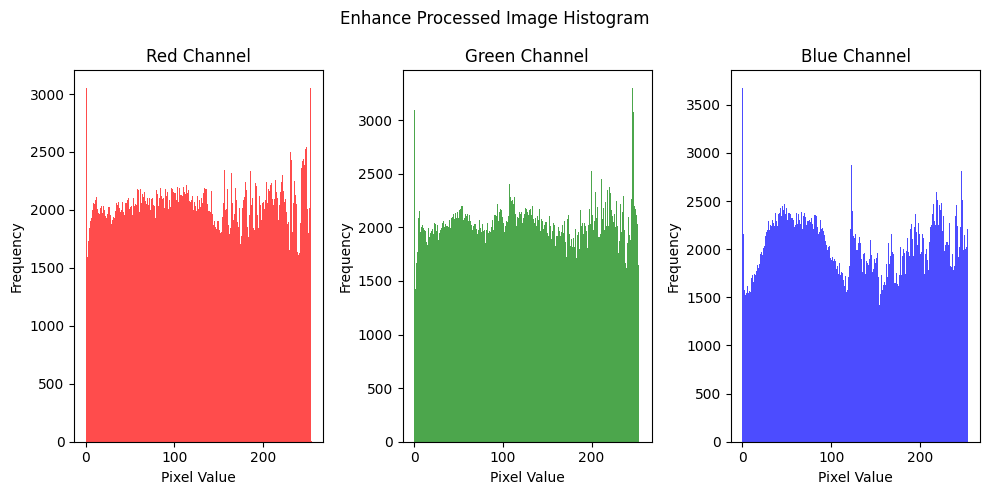

In [37]:
plot_histogram(image, "Original Image Histogram")  # Гистограмма оригинального изображения
plot_histogram(equalized_image, "Processed Image Histogram")  # Гистограмма обработанного изображения
plot_histogram(enc_equalized_image, "Enhance Processed Image Histogram")  # Гистограмма обработанного изображения